Suppor Vector Machine - Predicting troponin level

In [8]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [9]:
train_data = pd.read_csv('data/train-dataset.csv')
test_data = pd.read_csv('data/test-dataset.csv')
dev_data = pd.read_csv('data/dev-dataset.csv')
print(len(train_data.columns))

100


In [10]:
x_train = train_data.drop('TROPTHSMesswert', axis=1)
y_train = train_data['TROPTHSMesswert']

all_feature_names = x_train.columns

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [12]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)

selected_features = np.where(lasso.coef_ != 0)[0]
x_train = x_train[:, selected_features]

selected_feature_names = all_feature_names[selected_features]

coef = pd.Series(lasso.coef_[selected_features], index = selected_feature_names)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print("The variables Lasso picked: ", selected_feature_names)

len(selected_feature_names)

Lasso picked 60 variables and eliminated the other 0 variables
The variables Lasso picked:  Index(['Alter', 'ALBMesswert', 'APHMesswert', 'BAD#Value',
       'BASO_RESEARCHValue', 'BASO#_RESEARCHValue', 'CAKORRMesswert',
       'CLMesswert', 'CPK37Messwert', 'EO#_RESEARCHValue', 'FEMesswert',
       'FT3RMesswert', 'GEMesswert', 'GLUCMesswert', 'GPT37Messwert',
       'HBAIFCCMesswert', 'HBAMesswert', 'HCTValue', 'HFLC#Value', 'HFLCValue',
       'HSMesswert', 'HSTMesswert', 'IG_RESEARCHValue', 'IG#_RESEARCHValue',
       'INRQMesswert', 'INTER6Messwert', 'KMesswert', 'LDLMesswert',
       'LEUMesswert', 'LYMPH_RESEARCHValue', 'LYWXValue', 'LYWZValue',
       'LYXValue', 'LYYValue', 'MCHCValue', 'MICRORValue',
       'MONO_RESEARCHValue', 'MOWXValue', 'MOWYValue', 'MOWZValue', 'MOXValue',
       'MOYValue', 'MOZValue', 'MPVValue', 'NAMesswert', 'NESFLValue',
       'NEWXValue', 'NEWYValue', 'NEWZValue', 'nFT4Messwert', 'NRBCValue',
       'PCTValue', 'PROBNPMesswert', 'PTTAFMesswert', 

60

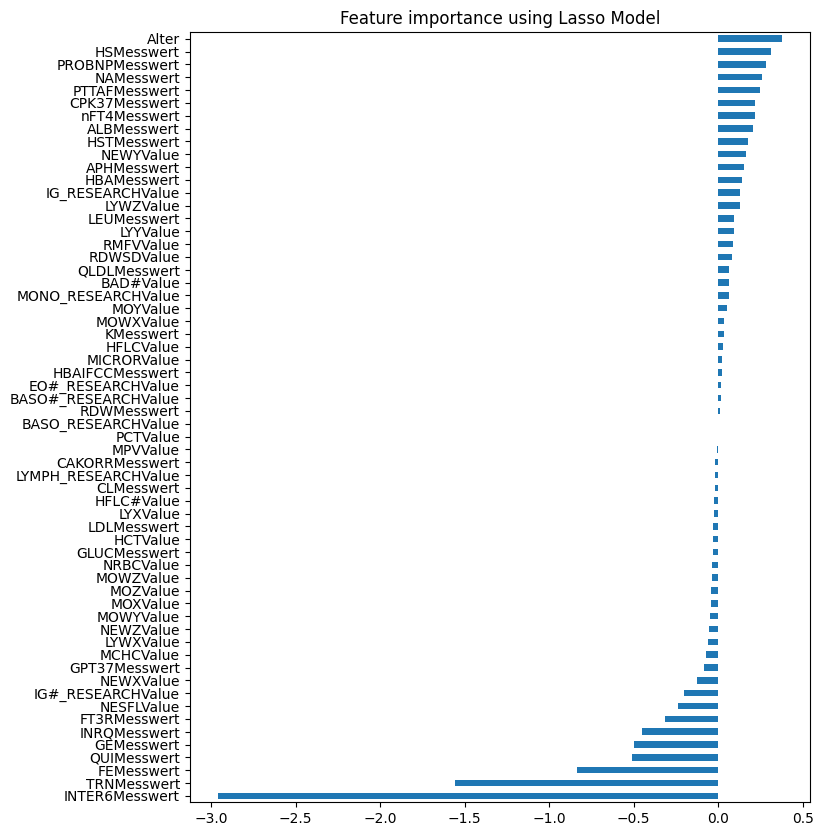

<Figure size 800x1000 with 0 Axes>

In [14]:
# Visualize feature importance
%matplotlib inline

imp_coef = coef.sort_values()  # Ensure coef is defined
plt.rcParams['figure.figsize'] = (8.0, 10.0)  # Set the figure size
imp_coef.plot(kind="barh")  # Plot horizontal bar chart
plt.title("Feature importance using Lasso Model")  # Add title
plt.show()  # Make sure to explicitly show the plot
plt.clf()  # Clears the figure
